# Neural Network with Python

Notes:

- PyTorch as a replacement for NumPy to use the power of GPUs ? ( research: only cuda support ...)
- [PyTorch vs. NumPy](https://medium.com/python-pandemonium/how-pytorch-will-replace-numpy-2df48427f56d)
- `Text -> Topic` is a good purpose for neural networks
- [Interactive Topics on Machine learning using python](https://engmrk.com)
- [Master Thesis - Machine Learning Based Recommendation Systems](https://engmrk.com/module-18-machine-learning-based-recommendation-systems/?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com)
- [Use a cloud gpu freely within kaggle.com](https://www.kaggle.com/dansbecker/running-kaggle-kernels-with-a-gpu)
- [Machine Learning Datasets - Tensorflow](https://www.tensorflow.org/datasets/overview)
  - Note that tensorflow-datasets expects you to have TensorFlow already installed, and currently depends on tensorflow (or tensorflow-gpu) >= 1.15.0.
- [How to get and use MNIST data in Tensorflow](https://hyunyoung2.github.io/2018/01/18/How_To_Get_And_Use_MNIST_In_Tensorflow/)
- [Overview of Basic Numpy Operations](https://www.pluralsight.com/guides/overview-basic-numpy-operations)

In [1]:
import matplotlib.pyplot
import numpy
import scipy
import scipy.special
import imageio
import glob
import zipfile
%matplotlib inline

## Global Cells

- Variables used globally in the document

Choose Small Training Set (100):

In [ ]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_datasets/mnist_train_100.csv", 'r')
global_training_data = training_data_file.readlines()
training_data_file.close()

Choose Large Training Set (60,000):

In [2]:
zipHandle = zipfile.ZipFile("mnist_datasets/mnist_train.csv.zip")
global_training_data = [b.decode() for b in zipHandle.open("mnist_train.csv").readlines()]
zipHandle.close()

Choose Small Testing Set (10):

In [ ]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_datasets/mnist_test_10.csv", 'r')
global_test_data = test_data_file.readlines()
test_data_file.close()

Choose Large Testing Set (10,000):

In [3]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_datasets/mnist_test.csv", 'r')
global_test_data = test_data_file.readlines()
test_data_file.close()

Final NeuralNetwork Class:

In [4]:
# FINAL neural network class definition
class NeuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, learningRate, iNodes, hNodes, oNodes):
        # set number of nodes in each input, hidden, output layer
        self.inodes = iNodes
        self.hnodes = hNodes
        self.onodes = oNodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningRate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


Global Training Function:

In [5]:
# train the neural network

def training(epochs, network):
# epochs is the number of times the training data set is used for training
    
    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:

            # split the record by the ',' commas
            one_letter = record.split(',')

            imageData = one_letter[1:]
            mark = int(one_letter[0])

            # scale and shift the network training inputs
            inputs = (numpy.asfarray(imageData) / 255.0 * 0.99) + 0.01

            # create the network target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(network.onodes) + 0.01

            # all_values[0] is the target label for this record
            targets[mark] = 0.99

            network.train(inputs, targets)
            pass
        pass

---

## Introduction to a simple Neural Network

- We start with a simple scaffold for our three layers network - an object

In [2]:
# neural network class definition

class NeuralNetwork():
    
    def __init__():
        pass
    
    def train():
        pass
    
    def query():
        pass

- Add constructor parameters like the amount of `nodes` each layer of the network has or the `learningrate`. 

- For now, our network is limited to three layers: `input nodes` (input layer), 1x `hidden nodes` (hidden layer), `output nodes` (output layer)

In [3]:
# neural network class definition

class NeuralNetwork():
    
    def __init__(self, learningRate, iNodes, hNodes, oNodes):
        self.learningRate = learningRate
        self.inputNodes = iNodes
        self.hiddenNodes = hNodes
        self.outputNodes = oNodes
    
    def train():
        pass
    
    def query():
        pass

## Parameter für das Netzwerk:

### 1. Nodes and Learnrate

In [4]:
sampleLayerNodes = 3
sampleLearnRate = 0.3

### 2. Gewichte – das Herz des Netzes

Im nächsten Schritt wird das Netz der Knoten und Verknüpfungen erstellt. Die wichtigsten Elemente des Netzes sind die Verknüpfungsgewichte. Diese Gewichte bestimmen die Signalanteile, die das Netz in Vorwärtsrichtung weiterleitet, und die Fehleranteile, die das Netz in Rückwärtsrichtung durchlaufen. Schließlich sind es die Verknüpfungsgewichte selbst, die verfeinert werden, um die Reaktion des Netzes auf Eingaben zu verbessern.

Da sich die Gewichte kurz und bündig als Matrix ausdrücken lassen, können wir Folgendes erzeugen: Eine Matrix mit den Gewichten für die Verknüpfungen zwischen der Eingabeschicht und der versteckten Schicht, Winput_hidden, der Größe (hidden_nodes mal input_nodes). Eine andere Matrix für die Verknüpfungen zwischen der versteckten Schicht und der Ausgabeschicht, Whidden_output, der Größe (output_nodes mal hidden_nodes)

> Rashid, Tariq. Neuronale Netze selbst programmieren: Ein verständlicher Einstieg mit Python (Animals) (German Edition) (S.121). O'Reilly. Kindle-Version. 

---

- Die Anfangswerte der Verknüpfungsgewichte sollten klein und zufällig sein. Dafür wird die funktion `random.rand()` vom Modul `numpy` benutzt.

- Der Bereich bewegt sich zwischen -0.5 und 0.5 (Wichtig im Beispiel ist 0,5 abzuziehen) **NOTE:** Wie funktioniert das ?

#### Standard Gewichtung:

In [5]:
def weightMatrice(aNodes, bNodes):
    return numpy.random.rand(aNodes, bNodes) - 0.5

In [6]:
print(weightMatrice(3,3))

[[ 0.31287809  0.00487951 -0.43805093]
 [-0.34616448 -0.19196289  0.1599676 ]
 [-0.30370881  0.42759796  0.41126407]]


#### Die komplexere Gewichtung mit 'Normalverteilung' (Die in unserem Netzwerk benutzt werden soll):

In [7]:
def weightMatriceNormal(bNodes, aNodes):
    return numpy.random.normal(0.0, pow(aNodes, -0.5), (aNodes, bNodes))

Sample output of `weightMatriceNormal`

In [8]:
sample_w_i_h = weightMatriceNormal(3,3)

print(sample_w_i_h)

[[-0.26713278 -1.24016208 -0.161812  ]
 [-0.51865148 -0.27299027  0.14079399]
 [-0.27637724 -0.23549412  0.18617501]]


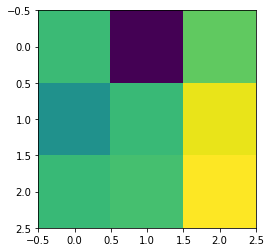

In [9]:
matplotlib.pyplot.imshow(sample_w_i_h, interpolation="nearest")

- Now we update our `NetworkClass` to create the inital matrices for the weight connections between Input Layer and Hidden Layer and also between Hidden Layer and Output Later:

```
        self.weightInputToHidden = weightMatriceW_I_H(iNodes=iNodes, hNodes=hNodes)
        self.weightHiddenToOutput = numpy.random.rand(hNodes=hNodes, oNodes=oNodes)
```

In [10]:
# neural network class definition

class NeuralNetwork():
    
    def __init__(self, learningRate, iNodes, hNodes, oNodes):
        self.learningRate = learningRate
        self.inputNodes = iNodes
        self.hiddenNodes = hNodes
        self.outputNodes = oNodes
        
        # link weight matrices, w_i_h and w_h_o
        # w = weight; i = input; h = hidden; o = output
        # w_i_h = weightInputToHidden | w_h_o = weightHiddenToOutput
        # weights inside the arrays are w_i_j,
        # where link is from node i to node j in the next layer 
        # w_1_1 -> w_2_1 
        # w_1_2 -> w_2_2 etc ...
        self.weightInputToHidden = weightMatriceNormal(aNodes=iNodes, bNodes=hNodes)
        self.weightHiddenToOutput = weightMatriceNormal(aNodes=hNodes, bNodes=oNodes)

    
    def train():
        pass
    
    def query():
        pass

### The Network method `query`

- The `query` is responsible for I/O of the network

- At first multiply a given input matrice with the **weights** matrice. That matrice reflects the weight values of each node connection between **first and second layer** (known as input layer and hidden layer -> w_i_h = weight_input_hidden)

Sample output:

In [12]:
outputWeighted = numpy.dot(weightMatriceNormal(3,3), [2, 3, 5])
print(outputWeighted)

[-1.69229923  1.08006595  4.98363431]


- We now have the `moderated input` for the Hidden Layer
- Now we apply the `sigmoid` function onto the result (`scipy.special.expit`) which is our output from the hidden layer. This is called `activation`.
- This simulates the neuronal activation threshold like in real brains
- The output will then passed to the next layer, where again the `moderation` and `activation` will apply.

In [13]:
print(scipy.special.expit(outputWeighted))

[0.15547371 0.74650646 0.99319747]


In [14]:
def query(inputs, w_i_h, w_h_o):
    # X_input_hidden = W_input_hidden * I
    hidden_inputs = numpy.dot(w_i_h, inputs)
    hidden_outputs = scipy.special.expit(hidden_inputs)
    
    final_inputs = numpy.dot(w_h_o, hidden_outputs)
    final_outputs = scipy.special.expit(final_inputs)
    
    return final_outputs

Sample network query output:

In [15]:
print(query([3, 5, 8], weightMatriceNormal(3,3), weightMatriceNormal(3,3)))

[0.4717975  0.24467724 0.3158787 ]


#### Back to our NeuralNetwork class:
- We add a shortcut to the `sigmoid` function (scipy.special.expit) into our class as the member `activation`
- We add the implementation for the `query` method as before (parameter signature changes when sitting in the object instance context though):

In [16]:
# neural network class definition

class NeuralNetwork():
    
    def __init__(self, learningRate, iNodes, hNodes, oNodes):
        self.learningRate = learningRate
        self.inputNodes = iNodes
        self.hiddenNodes = hNodes
        self.outputNodes = oNodes

        self.weightInputToHidden = weightMatriceNormal(aNodes=iNodes, bNodes=hNodes)
        self.weightHiddenToOutput = weightMatriceNormal(aNodes=hNodes, bNodes=oNodes)
    
        self.activation = lambda x: scipy.special.expit(x)
        
    def query(self, inputs):
        # convert inputs to numpy array
        inputs = numpy.array(inputs, ndmin=2).T
        
        # X_input_hidden = W_input_hidden * I
        hidden_inputs = numpy.dot(self.weightInputToHidden, inputs)
        hidden_outputs = self.activation(hidden_inputs)

        final_inputs = numpy.dot(self.weightHiddenToOutput, hidden_outputs)
        final_outputs = self.activation(final_inputs)
    
        return final_outputs
    
    def train():
        pass

In [17]:
print(type(weightMatriceNormal(3,3)))
print(type(numpy.array(weightMatriceNormal(3,3), ndmin=2).T))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Testing time !

- Now we create a small network and fire specific inputs at it to see if the wiring works and if `query` gives us an output:

In [18]:
n = NeuralNetwork(learningRate=sampleLearnRate, iNodes=3, hNodes=3, oNodes=3)

In [19]:
n.query([1.0, 0.5, -1.5])

array([[0.65125474],
       [0.51520541],
       [0.43942499]])

### The Network method `train`

It has two steps:

1. Create the output for given input data (which is the same what `query` does)
2. Compare the output with the training data and recalculate (& improve) the network weights
    1. Calculate `The Error (E)` = Difference of training data and output data
    2. Calculate Error Back Propagation (EBP) from (E) for each layer before the output layer, like `hidden_errors` = `Weights_Hidden_Output` * `E as output_errors`
    3. Update the Weights relative to (E) and (EBP) for each layer

#### Back to our NeuralNetwork class (final definition):
- We add the implementation for the `train` method:

In [17]:
# FINAL neural network class definition
class NeuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, learningRate, iNodes, hNodes, oNodes):
        # set number of nodes in each input, hidden, output layer
        self.inodes = iNodes
        self.hnodes = hNodes
        self.onodes = oNodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningRate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


# Training

> Detecting hand written letters is a very good training scenario.

- Testing and Training Data can be found on: 

- http://yann.lecun.com/exdb/mnist/ (Format is not easy...)
 
CSV: 
- Training: http://www.pjreddie.com/media/files/mnist_train.csv (60,000 Entries - marked)

- Test: http://www.pjreddie.com/media/files/mnist_test.csv (10,000 Entries - marked)

- Training: https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/tree/master/mnist_dataset (10 Entries - marked)

These files represent handwritten images where each line represents a number between 0 and 9. Each number in a line is comma separated like in csv files'.

- The very first number of a line represents the number shown in the image
- Then 28*28 numbers between 0-255 follow (the image itself, encoded in 8-bit gray tones)

In [21]:
fh = open("mnist_datasets/mnist_test_10.csv")

images = []

for line in fh:
    data = line.split(",")
    resultMarker = data[:1]
    images.append(numpy.asfarray(data[1:]).reshape((28,28)))
    
fh.close()

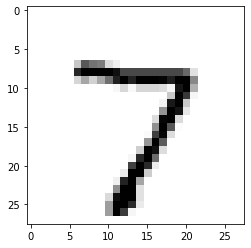

In [22]:
matplotlib.pyplot.imshow(images[0], cmap="Greys", interpolation="None")

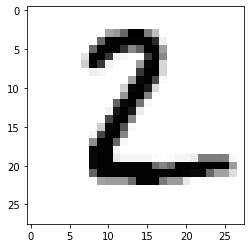

In [23]:
matplotlib.pyplot.imshow(images[1], cmap="Greys", interpolation="None")

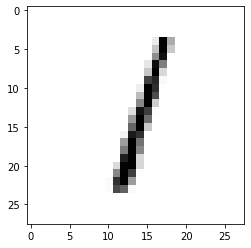

In [24]:
matplotlib.pyplot.imshow(images[2], cmap="Greys", interpolation="None")

### Preparation of Input and Output boundaries for the Training

- The Image data itself serves as the **network training output**
- A List of numbers between 0.01-0.99 serves as the **network target output**
- We need to 'normalize' this data to the scale of `0.01 to 0.99`

We need to convert our **network training input** from the 8-bit range (0-255) of the images relative to a scale between 0.01 to 1.0 to work with our activation function (scipy.special.expit):

In [25]:
fh = open("mnist_datasets/mnist_test_10.csv")

one_letter = fh.readlines()[0].split(",")

scaled_input = (numpy.asfarray(one_letter[180:240]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.33611765
 0.72823529 0.62729412 0.59623529 0.24294118 0.14976471 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.87188235 0.99611765 0.99611765
 0.99611765 0.99611765 0.94564706 0.77870588 0.77870588 0.77870588]


In our specific case we need a network with 9 output nodes, so we need to create our **network target output** as an array with a length of 9, where the image number is encoded as max. possible value relative to the activation function (in this case. 0.99). Each output node stands for each number we are looking for (0-9)

Example:

- We have an image with the number 5

- So the resulting array should have the max. output at index 6:

`[0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01]`

- For all other (non valid) numbers we should have the minimum output set (which is 0.01)

In [26]:
#output nodes is 10 (example)
onodes = 10
targets = numpy.zeros(onodes) + 0.01 
targets[int(one_letter[0])] = 0.99

In [27]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


## Start Training !

In [13]:
# learning rate
learning_rate = 0.1

def createNetwork(learningRate):
    input_nodes = 784
    hidden_nodes = 200
    output_nodes = 10
    return NeuralNetwork(learningRate=learningRate, iNodes=input_nodes, hNodes=hidden_nodes, oNodes=output_nodes)

In [56]:
# create instance of neural network
network0 = createNetwork(learningRate=learning_rate)

Document global training function:

In [18]:
# train the neural network

def training(network, trainingData, epochs):
# epochs is the number of times the training data set is used for training
    
    for e in range(epochs):
        # go through all records in the training data set
        for record in trainingData:

            # split the record by the ',' commas
            one_letter = record.split(',')

            imageData = one_letter[1:]
            mark = int(one_letter[0])

            # scale and shift the network training inputs
            inputs = (numpy.asfarray(imageData) / 255.0 * 0.99) + 0.01

            # create the network target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(network.onodes) + 0.01

            # all_values[0] is the target label for this record
            targets[mark] = 0.99

            network.train(inputs, targets)
            pass
        pass

### Start training:

In [58]:
training(network=network0, trainingData=global_training_data, epochs=8)

## Testing the trained Network

#### Testing a single letter:

Testing Letter:  7
Visual verification that the image displays a  7 :


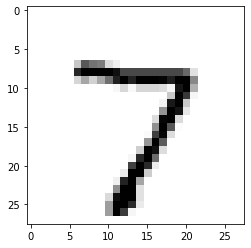

In [33]:
one_letter = test_data_list[0].split(",")
mark = one_letter[0]
print("Testing Letter: ", mark)

imageData = one_letter[1:]
normalizedForView = numpy.asfarray(one_letter[1:]).reshape((28,28))
print("Visual verification that the image displays a ", mark, ":")
matplotlib.pyplot.imshow(normalizedForView, cmap="Greys", interpolation="None")

In [47]:
# encode image data
encodedData = (numpy.asfarray(imageData) / 255 * 0.99) + 0.01
result = trainedNetwork.query(encodedData)
print(result)

[[0.00920732]
 [0.01129117]
 [0.00668644]
 [0.00231597]
 [0.03122899]
 [0.02336442]
 [0.0086663 ]
 [0.99483403]
 [0.00905493]
 [0.00105362]]


### Testing with a lot more letters:

Document global performance test function:

In [15]:
def performance(network, testData):
    # test the neural network

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in testData:
        # split the record by the ',' commas
        one_letter = record.split(',')

        # correct answer is first value
        correct_label = int(one_letter[0])

        # scale and shift the inputs
        inputs = (numpy.asfarray(one_letter[1:]) / 255.0 * 0.99) + 0.01

        # query the network
        outputs = network.query(inputs)

        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)

        # append correct or incorrect to list
        if (label == correct_label):
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass

        pass
    
    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    print ("performance = ", scorecard_array.sum() / scorecard_array.size)

In [61]:
performance(network=network0, testData=global_test_data)

performance =  0.9729


## Training analysis

- `test.py` for testing the network performance (5 times)

#### 1. Test Suite: (Testing Learning Rate - 1)

- 3 Layers
- input_nodes = 784
- hidden_nodes = 200
- output_nodes = 10

- Epochs: 1

- Training Data: mnist

- **Test target: *Learning Rate* (Which reflects the gradient step size) (Average of 5)**

- **Best fitness: 0.9584 = 0.16 | 0.9586 = 0.2 ** 

- See: analysis.pdf (link ?)

Text(0.5, 0, 'Learning Rate')

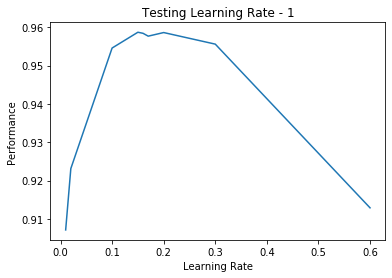

In [37]:
learningRates = [0.01, 0.02, 0.1, 0.15, 0.16, 0.17, 0.2, 0.3, 0.6]
learningRateResults = [0.90712, 0.92312, 0.95456, 0.95868, 0.9584, 0.95766, 0.9586, 0.95558, 0.91288]

matplotlib.pyplot.plot(learningRates,learningRateResults)

matplotlib.pyplot.title('Testing Learning Rate - 1')
matplotlib.pyplot.ylabel('Performance')
matplotlib.pyplot.xlabel('Learning Rate')

#### 2. Epochs Test Suite: (Testing Epochs - 1)

- 3 Layers
- input_nodes = 784
- hidden_nodes = 200
- output_nodes = 10

- *Learning Rate: 0.2*

- Training Data: mnist

- **Test target: Epochs (Average of 5)**

- **Best Fitness: 0.969 = 7**

- See: analysis.pdf

Text(0.5, 0, 'Epochs')

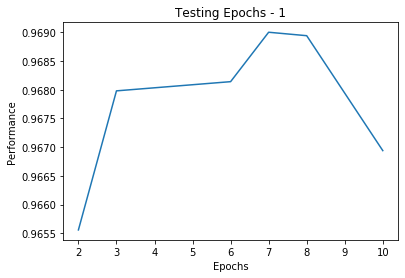

In [38]:
epochs = [2, 3, 6, 7, 8, 10]
epochResults = [0.96556, 0.96798, 0.96814,	0.969, 0.96894, 0.96694]

matplotlib.pyplot.plot(epochs,epochResults)
matplotlib.pyplot.title('Testing Epochs - 1')
matplotlib.pyplot.ylabel('Performance')
matplotlib.pyplot.xlabel('Epochs')

> **Next Testcases:** For a higher amount of epoches, the learning rate could also be too high.

#### 3. Epochs Test Suite (Testing Epochs - 2) (Reducing Learning Rate):

- 3 Layers
- input_nodes = 784
- hidden_nodes = 200
- output_nodes = 10

- Learning Rate: **0.161**

- Training Data: mnist

- **Test target: Epochs (Average of 5)**

- **Best Fitness: 0.97196 = 7 **

- See: analysis.pdf

Text(0.5, 0, 'Epochs')

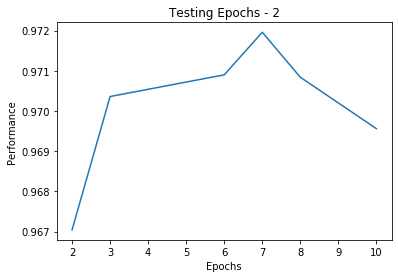

In [39]:
epochResults2 = [ 0.96704,	0.97036, 0.9709, 0.97196, 0.97084, 0.96956 ]

matplotlib.pyplot.plot(epochs, epochResults2)
matplotlib.pyplot.title('Testing Epochs - 2')
matplotlib.pyplot.ylabel('Performance')
matplotlib.pyplot.xlabel('Epochs')

#### 4. Epochs Test Suite (Testing Epochs - 3) (Reducing Learning Rate):

- 3 Layers
- input_nodes = 784
- hidden_nodes = 200
- output_nodes = 10

- Learning Rate: **0.12**

- Training Data: mnist

- **Test target: Epochs (Average of 5)**

- **Best Fitness: 0.97324 = 8 **

- See: analysis.pdf

Text(0.5, 0, 'Epoches')

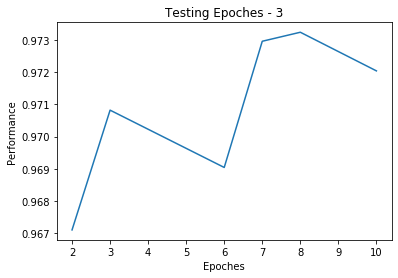

In [40]:
epochResults3 = [ 0.9671, 0.97082, 0.96904, 0.97296, 0.97324, 0.97204 ]

matplotlib.pyplot.plot(epochs, epochResults3)
matplotlib.pyplot.title('Testing Epoches - 3')
matplotlib.pyplot.ylabel('Performance')
matplotlib.pyplot.xlabel('Epoches')

#### 5. Epochs Test Suite (Testing Epochs - 4) (Reducing Learning Rate):

- 3 Layers
- input_nodes = 784
- hidden_nodes = 200
- output_nodes = 10

- Learning Rate: **0.1**

- Training Data: mnist

- **Test target: Epochs (Average of 5)**

- **Best Fitness: 0.97196 = 7 **

- See: analysis.pdf

Text(0.5, 0, 'Epoches')

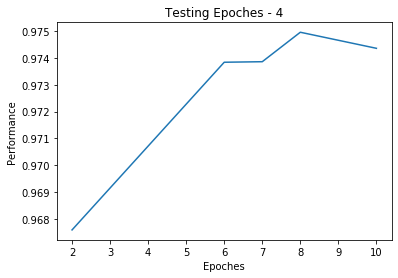

In [41]:
epochsShort1 = [2, 6, 7, 8, 10]
epochResults4 = [ 0.96758, 0.97384, 0.97386, 0.97496, 0.97436 ]

matplotlib.pyplot.plot(epochsShort1, epochResults4)
matplotlib.pyplot.title('Testing Epoches - 4')
matplotlib.pyplot.ylabel('Performance')
matplotlib.pyplot.xlabel('Epoches')

### Comparison

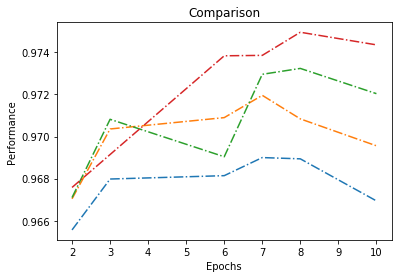

In [42]:
matplotlib.pyplot.ylabel('Performance')
matplotlib.pyplot.xlabel('Epochs')
matplotlib.pyplot.title('Comparison')

matplotlib.pyplot.plot(epochs, epochResults, '-.') # 0.2 Learningrate
matplotlib.pyplot.plot(epochs, epochResults2, '-.') # 0.161 Learningrate (Overall better ...)
matplotlib.pyplot.plot(epochs, epochResults3, '-.') # 0.12
matplotlib.pyplot.plot(epochsShort1, epochResults4, '-.') # 0.1
matplotlib.pyplot.show()

## Testing your own images

- Pictures need to be reduced to size: 28x28

**Preparation**: Create a new network instance and train it (should use 60,000 test set):

In [19]:
print("Creating a new network instance 'network1'")
network1 = createNetwork(learningRate=0.1)
print("Training ongoing, this might take a while ...")
training(network=network1, trainingData=global_training_data, epochs=8)
print("------------------------")
print("Done!")
print("------------------------")
performance(network=network1, testData=global_test_data)

Creating a new network instance 'network1'
Training ongoing, this might take a while ...
------------------------
Done!
------------------------
performance =  0.9743


Convert images into float array and reduce the colors to gray tones:

In [20]:
def convertImage(path):
    img_array = 255.0 - imageio.imread(path, as_gray=True)
    # remove dark noise:
    img_array = numpy.where(img_array > 200, 255, img_array)
    return img_array.reshape(784), img_array

Normalize image data for network input:

In [10]:
def normalize(img_data):
    return (img_data / 255.0 * 0.99) + 0.01

Test query network:

In [11]:
def test(network, inputs):
    guess = network.query(inputs).flatten().tolist()
    print(guess)
    return guess.index(max(guess))

0.27167687
[0.11005946503253365, 0.01007293515827599, 0.014736121024722998, 0.20134312930224899, 0.00577662927085264, 0.01582297931752998, 0.02248886210646549, 0.029047631436569236, 0.7439773646676674, 0.1998051094917331]
Network says : 8 | Expected:


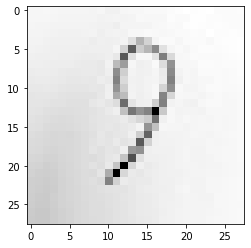

0.25000313
[0.21028889689277566, 0.02540873886085475, 0.012204661246488167, 0.20040728697973115, 0.01054185034469541, 0.0832416399293289, 0.03362686667673204, 0.028776116644163918, 0.6859916165013988, 0.17193299942962773]
Network says : 8 | Expected:


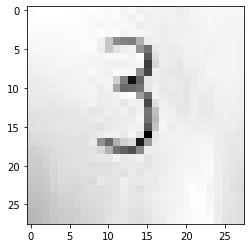

0.27012855
[0.2634768468735983, 0.022314207572435588, 0.04280382668062584, 0.09679013331055306, 0.010075061586028805, 0.06862546452847082, 0.05754084695467557, 0.008168461764261913, 0.501203602332863, 0.17161410920659]
Network says : 8 | Expected:


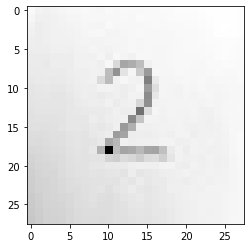

0.2645381
[0.1606305331143905, 0.014209729046911512, 0.019156427271720334, 0.14761475223157214, 0.005907757668159275, 0.022031260751314643, 0.03537551315098713, 0.017754293433913243, 0.684033863078741, 0.2061659356183089]
Network says : 8 | Expected:


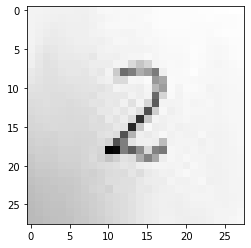

In [24]:
results = []

for file_name in glob.glob("my-images/IMG_285*.png"):
    img_data, img_array = convertImage(path=file_name)
    img_data = normalize(img_data=img_data)
    
    print(scipy.average(img_data))
    print("Network says :", test(network=network1, inputs=img_data), "| Expected:")
    matplotlib.pyplot.imshow(img_array, cmap="Greys", interpolation="None")
    matplotlib.pyplot.show()
    